In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull().sum().head()

survived      0
pclass        0
sex           0
age         177
sibsp         0
dtype: int64

In [5]:
df["age"].mode()   ## see witout filtering the mode

0    24.0
Name: age, dtype: float64

In [6]:
df["age"][df["age"].notna()].mode()[0]     ## always use [0]   to get the value instead of a seriess 

24.0

In [7]:
## handling imbalnaced dataset ---
data={
  "Name":["Akash","aryan","lakun","roshni"],
  "class":[34,54,65,34],
  "tell":[1,1,1,0]
}
data=pd.DataFrame(data)
data_minor=data[data["tell"]==0]
data_major=data[data["tell"]==1]

In [8]:
from sklearn.utils import resample

## Upsampling --
data_minor_re=resample(data_minor,replace=True,n_samples=len(data_major),random_state=42)
data_minor_re

## n_samples is the parameter to do upsmapling or downsampling --important
new_data=pd.concat([data_major,data_minor_re])
new_data

### same for down sampling also --important



,Name,class,tell
0,Akash,34,1
1,aryan,54,1
2,lakun,65,1
3,roshni,34,0
3,roshni,34,0
3,roshni,34,0


In [ ]:
## Handling imbalanced dataset using --SMOTE 
from imblearn.over_sampling import SMOTE
data1={
  "age":[45,23,24,12,67,54,61,87],
  "class":[34,54,65,34,5,3,7,8],
  "tell":[1,1,1,0,1,1,1,0]
}
data2=pd.DataFrame(data1)
data2[["age","class"]]
label=data2["tell"]

## using SMOTE 
oversample=SMOTE(k_neighbors=1)          ### k_neighbours means chooses k data point and chooses only one from them, to use for filling each minority data
X,y=oversample.fit_resample(data2[["age","class"]],data2["tell"])  

## By using SMOTE,the minority class is being Upsampled by interpolation ---important

In [ ]:
### Handling outliers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=sns.load_dataset("titanic")
df.head(2)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


[]

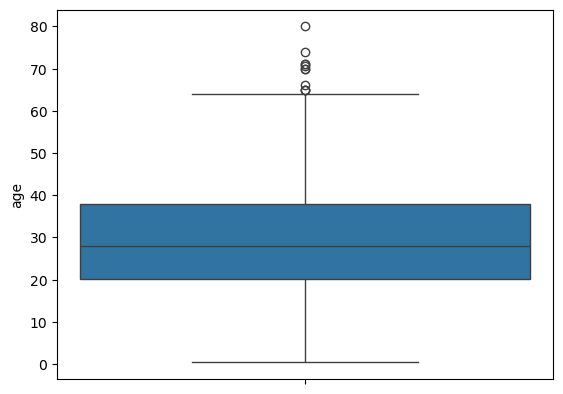

In [24]:
## 1. By box plot ---

sns.boxplot(y=df["age"])
plt.plot()

In [33]:
np.quantile(df["fare"],0.75)      ## to find value in any percentile

31.0

In [43]:
q1=df["age"].quantile(0.25)
q3=df["age"].quantile(0.75)
iqr=q3-q1

lower=q1-1.5*(iqr)
upper=q3+(1.5*iqr)
upper
lower

-6.6875